In [1]:
%matplotlib inline

# 张量

In [2]:
from __future__ import print_function
import torch

In [3]:
x=torch.empty(5,3)
print(x)

tensor([[3.5873e-43, 3.6013e-43, 3.5873e-43],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.1704e-41, 0.0000e+00, 2.2369e+08],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [4]:
x=torch.rand(5,3)
x

tensor([[0.7698, 0.3190, 0.1540],
        [0.2640, 0.1693, 0.8077],
        [0.5370, 0.5970, 0.1142],
        [0.9691, 0.6724, 0.0668],
        [0.7993, 0.1127, 0.4453]])

In [5]:
x=torch.zeros(5,3,dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [6]:
x=torch.tensor([5.5,3])
x

tensor([5.5000, 3.0000])

In [7]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* 方法来创建对象
print(x)

x = torch.randn_like(x, dtype=torch.float)    # 覆盖 dtype!
print(x)                                      #  对象的size 是相同的，只是值和类型发生了变化

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.8853, -1.5841, -1.0577],
        [ 1.0057, -1.2531, -0.9055],
        [-0.2697, -1.4350, -0.5507],
        [ 1.3220,  0.9962, -0.7642],
        [ 2.5969,  0.9986,  0.5966]])


In [8]:
y=torch.rand(5,3)

In [9]:
x+y

tensor([[-0.1761, -1.5042, -0.4848],
        [ 1.0826, -0.5115, -0.0851],
        [ 0.5832, -1.2602, -0.1076],
        [ 2.0568,  1.3717, -0.5783],
        [ 3.1233,  1.9057,  1.3272]])

In [10]:
torch.add(x,y)

tensor([[-0.1761, -1.5042, -0.4848],
        [ 1.0826, -0.5115, -0.0851],
        [ 0.5832, -1.2602, -0.1076],
        [ 2.0568,  1.3717, -0.5783],
        [ 3.1233,  1.9057,  1.3272]])

In [11]:
result=torch.empty(5,3)
torch.add(x,y,out=result)

tensor([[-0.1761, -1.5042, -0.4848],
        [ 1.0826, -0.5115, -0.0851],
        [ 0.5832, -1.2602, -0.1076],
        [ 2.0568,  1.3717, -0.5783],
        [ 3.1233,  1.9057,  1.3272]])

In [12]:
result

tensor([[-0.1761, -1.5042, -0.4848],
        [ 1.0826, -0.5115, -0.0851],
        [ 0.5832, -1.2602, -0.1076],
        [ 2.0568,  1.3717, -0.5783],
        [ 3.1233,  1.9057,  1.3272]])

In [13]:
y.add_(x)
y

tensor([[-0.1761, -1.5042, -0.4848],
        [ 1.0826, -0.5115, -0.0851],
        [ 0.5832, -1.2602, -0.1076],
        [ 2.0568,  1.3717, -0.5783],
        [ 3.1233,  1.9057,  1.3272]])

In [14]:
x=torch.randn(4,4)
y=x.view(16)
z=x.view(-1,8)
print(x.size(),y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [15]:
a=torch.ones(5)
b=a.numpy()

In [16]:
a,b

(tensor([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.], dtype=float32))

In [17]:
a.add_(1)
a,b

(tensor([2., 2., 2., 2., 2.]), array([2., 2., 2., 2., 2.], dtype=float32))

In [18]:
import numpy as np
a=np.ones(5)
b=torch.from_numpy(a)

In [19]:
a,b

(array([1., 1., 1., 1., 1.]),
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64))

In [20]:
np.add(a,1,out=a)

array([2., 2., 2., 2., 2.])

In [21]:
a,b

(array([2., 2., 2., 2., 2.]),
 tensor([2., 2., 2., 2., 2.], dtype=torch.float64))

# 自动微分

In [22]:
x=torch.ones(2,2,requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [23]:
y=x+2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [24]:
y.grad_fn

In [25]:
z=y*y*3
out=z.mean()
z,out

(tensor([[27., 27.],
         [27., 27.]], grad_fn=<MulBackward0>),
 tensor(27., grad_fn=<MeanBackward0>))

In [26]:
out.backward()

In [27]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [28]:
x=torch.randn(3,requires_grad=True)
y=x*2
while y.data.norm()<1000:
    y=y*2
print(y)

tensor([-1869.2231,   376.0224,    76.4356], grad_fn=<MulBackward0>)


In [29]:
gradients=torch.tensor([0.1,1.0,0.0001],dtype=torch.float)
y.backward(gradients)

In [30]:
x.grad

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])

# 神经网络

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1= nn.Linear(16*5*5,120)
        self.fc2= nn.Linear(120,84)
        self.fc3= nn.Linear(84,10)
        
        
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(-1,self.num_flat_features(x))
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    
    def num_flat_features(self,x):
        size=x.size()[1:]
        num_features=1
        for s in size:
            num_features*=s
        return num_features

        

In [33]:
net=Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [34]:
params=list(net.parameters())

In [35]:
input=torch.randn(1,1,32,32)
out=net(input)

In [36]:
out

tensor([[ 0.1350,  0.0382, -0.1003, -0.0484,  0.0289, -0.0786,  0.0055, -0.0732,
         -0.0854, -0.0093]], grad_fn=<AddmmBackward>)

In [37]:
net.zero_grad()
out.backward(torch.randn(1,10))

## 损失函数

In [38]:
output=net(input)
target=torch.randn(10)
target=target.view(1,-1)
criterion=nn.MSELoss()

loss=criterion(output,target)
loss

tensor(1.4896, grad_fn=<MseLossBackward>)

In [39]:
loss.grad_fn

In [40]:
loss.grad_fn.next_functions[0][0]

## 反向传播

In [41]:
net.zero_grad()

net.conv1.bias.grad



tensor([0., 0., 0., 0., 0., 0.])

In [42]:
loss.backward()

In [43]:
net.conv1.bias.grad

tensor([-0.0159, -0.0009,  0.0050, -0.0121, -0.0016, -0.0251])

## 更新权重

In [44]:
import torch.optim as optim

optimizer=optim.SGD(net.parameters(),lr=0.01)

optimizer.zero_grad()
output=net(input)
loss=criterion(output,target)
loss.backward()
optimizer.step()

# CNN

## 加载和归一化训练集和测试集

In [50]:
import torchvision
import torchvision.transforms as transforms

In [57]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)


testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truch')

Files already downloaded and verified
Files already downloaded and verified


In [58]:
import matplotlib.pyplot as plt
import numpy as np

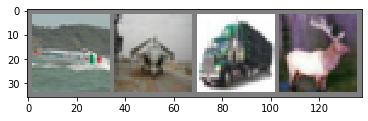

In [59]:
def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    
dataiter=iter(trainloader)
images,labels=dataiter.next()

imshow(torchvision.utils.make_grid(images))



## 定义一个cnn

In [61]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        return x 
    
net=Net()

## 定义损失函数和优化器

In [62]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

## 训练网络

In [63]:
for epoch in range(2):
    running_loss=0.0
    for i ,data in enumerate(trainloader,0):
        inputs,labels=data
        
        optimizer.zero_grad()
        
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if i%2000==1999:
            print('[%d,%5d]lossL%.3f'%(epoch+1,i+1,running_loss/2000))
            running_loss=0.0
        

[1, 2000]lossL2.300
[1, 4000]lossL2.261
[1, 6000]lossL2.143
[1, 8000]lossL1.954
[1,10000]lossL1.769
[1,12000]lossL1.648
[2, 2000]lossL1.488
[2, 4000]lossL1.455
[2, 6000]lossL1.413
[2, 8000]lossL1.379
[2,10000]lossL1.357
[2,12000]lossL1.336


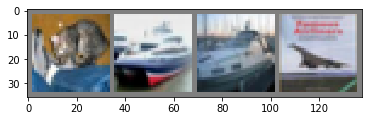

In [64]:
dataiter=iter(testloader)
images,labels=dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [65]:
output=net(images)

In [68]:
_,predicted=torch.max(output,1)
print('Predicted:',' '.join('%5s'%classes[predicted[j]] for j in range(4)))

Predicted:   cat  ship  ship plane


In [69]:
correct=0
total=0

with torch.no_grad():
    for data in testloader:
        images,labels=data
        outputs=net(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
        

In [70]:
correct*100/total

53.52